<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/reactions/GibbsReactor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install neqsim

# Gibbs Reactor
This notebook demonstrates how to use the GibbsReactor in neqsim for chemical equilibrium calculations. The GibbsReactor is useful for simulating chemical reactions in process engineering, such as combustion, gas treatment, and hydrogen production. It shows the most stable state of chemical compounds with kinetics and activation energy of the reactions being ignored. The calculations are based on minimizing the total Gibbs energy of a mixture.


In [2]:
from neqsim import jneqsim
import logging
logging.basicConfig(level=logging.INFO)


In [3]:
from neqsim.thermo import printFrame
from neqsim import jneqsim

## Case : Hydrogen Combustion (Basic Example)
We simulate the combustion of hydrogen with oxygen to form water. This is a classic example for testing the GibbsReactor and is relevant for hydrogen energy and fuel cell applications.

In [4]:
# Set up the system for hydrogen combustion using jNeqSim
system1 = jneqsim.thermo.system.SystemSrkEos(298.0, 1.0)
system1.addComponent('hydrogen', 0.1)
system1.addComponent('oxygen', 1.0)
system1.addComponent('water', 0.0)  # product will be formed
system1.setMixingRule(2)

# Create inlet stream
inlet_stream1 = jneqsim.process.equipment.stream.Stream('Inlet Stream', system1)
inlet_stream1.run()

# Create and run GibbsReactor in adiabatic mode
reactor = jneqsim.process.equipment.reactor.GibbsReactor('Gibbs Reactor', inlet_stream1)
reactor.setUseAllDatabaseSpecies(False)
reactor.setDampingComposition(0.01)
reactor.setMaxIterations(2500)
reactor.setConvergenceTolerance(1e-3)
reactor.setEnergyMode("adiabatic")
reactor.run()

# Get outlet system and print results
outlet1 = reactor.getOutletStream().getThermoSystem()
print('Outlet temperature [K]:', round(outlet1.getTemperature(), 2))
print('Hydrogen fraction:', round(outlet1.getComponent('hydrogen').getz(), 4))
print('Oxygen fraction:', round(outlet1.getComponent('oxygen').getz(), 4))
print('Water fraction:', round(outlet1.getComponent('water').getz(), 4))

Outlet temperature [K]: 982.04
Hydrogen fraction: 0.0
Oxygen fraction: 0.9048
Water fraction: 0.0952


## Case : Methane Steam Reforming (Hydrogen Production)
Methane steam reforming is a key industrial process for hydrogen production. The GibbsReactor can be used to estimate equilibrium yields and outlet compositions.

In [6]:
# Set up the system for methane steam reforming using jNeqSim
system3 = jneqsim.thermo.system.SystemSrkEos(1000.0, 3.0)  # 1000 K, 3 bar
system3.addComponent('methane', 1.0)
system3.addComponent('water', 2.0)
system3.addComponent('hydrogen', 0.0)
system3.addComponent('CO', 0.0)
system3.addComponent('CO2', 0.0)
system3.setMixingRule(2)

# Create inlet stream
inlet_stream3 = jneqsim.process.equipment.stream.Stream('Inlet Stream', system3)
inlet_stream3.run()

# Create and run GibbsReactor
reactor3 = jneqsim.process.equipment.reactor.GibbsReactor('Gibbs Reactor', inlet_stream3)
reactor3.setUseAllDatabaseSpecies(False)
reactor3.setDampingComposition(0.01)
reactor3.setMaxIterations(2500)
reactor3.setConvergenceTolerance(1e-3)
reactor3.setEnergyMode("isothermal")
reactor3.run()

# Get outlet system and print results
outlet3 = reactor3.getOutletStream().getThermoSystem()
print('Methane fraction:', round(outlet3.getComponent('methane').getz(), 4))
print('Hydrogen fraction:', round(outlet3.getComponent('hydrogen').getz(), 4))
print('CO fraction:', round(outlet3.getComponent('CO').getz(), 4))
print('CO2 fraction:', round(outlet3.getComponent('CO2').getz(), 4))
print("Heat of reactions", reactor3.getEnthalpyOfReactions(), "kJ/mol")
print("Temperature is", reactor3.getOutletStream().getThermoSystem().getTemperature("K"))


Methane fraction: 0.0317
Hydrogen fraction: 0.6033
CO fraction: 0.1207
CO2 fraction: 0.0603
Heat of reactions 0.0 kJ/mol
Temperature is 1000.0


In [9]:
# Methane combustion in air using jneqsim
system2 = jneqsim.thermo.system.SystemSrkEos(298.15, 1.0)
system2.addComponent("methane", 15)
system2.addComponent("ethane", 10)
system2.addComponent("propane", 0.1)
system2.addComponent("i-butane", 0.1)
system2.addComponent("n-butane", 0.1)
system2.addComponent("i-pentane", 0.1)
system2.addComponent("n-pentane", 0.1)
system2.addComponent("oxygen", 20.0)
system2.addComponent("nitrogen", 100.0)
system2.addComponent("NO2", 0.0)
system2.addComponent("NO", 0.0)
system2.addComponent("N2O5", 0.0)
system2.addComponent("N2O3", 0.0)
system2.addComponent("N2O", 0.0)
system2.addComponent("CO2", 0.0)
system2.addComponent("CO", 0.0)
system2.addComponent("water", 0.0)
system2.setMixingRule(2)
system2.init(0)

inlet_stream2 = jneqsim.process.equipment.stream.Stream("Inlet Stream", system2)
inlet_stream2.run()

reactor2 = jneqsim.process.equipment.reactor.GibbsReactor("Gibbs Reactor", inlet_stream2)
reactor2.setUseAllDatabaseSpecies(False)
reactor2.setDampingComposition(0.01)
reactor2.setMaxIterations(5000)
reactor2.setConvergenceTolerance(1e-3)
reactor2.run()

outlet2 = reactor2.getOutletStream().getThermoSystem()
printFrame(outlet2)

| 0                    | 1           | 2                  | 3   | 4   | 5   | 6               |
|:---------------------|:------------|:-------------------|:----|:----|:----|:----------------|
|                      | total       | GAS                |     |     |     |                 |
| methane              | 1.24412E-1  | 1.24412E-1         |     |     |     | [mole fraction] |
| ethane               | 3.84016E-5  | 3.84016E-5         |     |     |     | [mole fraction] |
| propane              | 2.04768E-9  | 2.04768E-9         |     |     |     | [mole fraction] |
| i-butane             | 6.25425E-18 | 6.25425E-18        |     |     |     | [mole fraction] |
| n-butane             | 6.25425E-18 | 6.25425E-18        |     |     |     | [mole fraction] |
| i-pentane            | 6.25425E-18 | 6.25425E-18        |     |     |     | [mole fraction] |
| n-pentane            | 6.25425E-18 | 6.25425E-18        |     |     |     | [mole fraction] |
| oxygen               | 6.25425E-18 | 6

In [ ]:
# Utility function to get component names from a neqsim fluid object
def get_component_list(fluid):
    """
    This function takes a fluid neqsim object as input and returns a list of components in the fluid.

    Args:
    - fluid: a neqsim fluid object

    Returns:
    - components_list: a list of names of components in the fluid
    """
    number_of_components = fluid.getNumberOfComponents()
    components_list = []
    for i in range(number_of_components):
        component = fluid.getComponent(i)
        name = component.getName()
        components_list.append(name)
    return components_list

## Case Study: Ammonia Production via Haber-Bosch Process
Ammonia (NH₃) is produced industrially by reacting nitrogen and hydrogen at high pressure and moderate temperature. The reaction is:
$$\mathrm{N_2 + 3H_2 \rightleftharpoons 2NH_3}$$
This process is crucial for fertilizer production. Here, we use the GibbsReactor to study the effect of pressure on ammonia yield at a fixed temperature (e.g., 450°C).

Pressure: 50 bar, Ammonia mole fraction: 0.0000
Pressure: 100 bar, Ammonia mole fraction: 0.0000
Pressure: 150 bar, Ammonia mole fraction: 0.0000
Pressure: 200 bar, Ammonia mole fraction: 0.0000
Pressure: 250 bar, Ammonia mole fraction: 0.0000
Pressure: 300 bar, Ammonia mole fraction: 0.0000


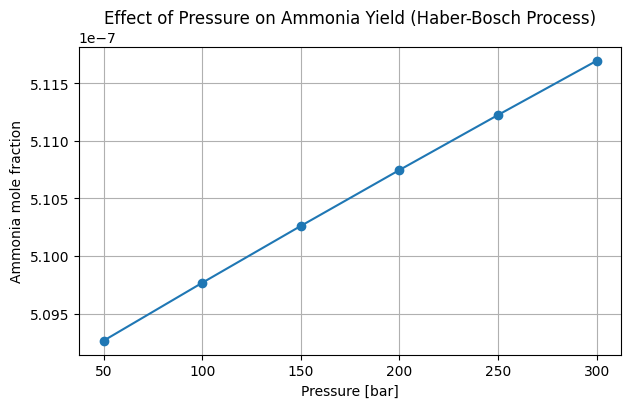

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Haber-Bosch process
T_C = 450  # Temperature in Celsius
T_K = T_C + 273.15
pressures = np.linspace(50, 300, 6)  # bar
NH3_yields = []

for P in pressures:
    # Set up the system for ammonia synthesis
    system_NH3 = jneqsim.thermo.system.SystemSrkEos(T_K, P)
    system_NH3.addComponent('nitrogen', 1.0)
    system_NH3.addComponent('hydrogen', 3.0)
    system_NH3.addComponent('ammonia', 0.0)
    system_NH3.setMixingRule(2)

    # Create inlet stream
    inlet_stream_NH3 = jneqsim.process.equipment.stream.Stream('Inlet Stream', system_NH3)
    inlet_stream_NH3.run()

    # Create and run GibbsReactor
    reactor_NH3 = jneqsim.process.equipment.reactor.GibbsReactor('Gibbs Reactor', inlet_stream_NH3)
    reactor_NH3.setUseAllDatabaseSpecies(False)
    reactor_NH3.setDampingComposition(0.1)
    reactor_NH3.setMaxIterations(2500)
    reactor_NH3.setConvergenceTolerance(1e-3)
    reactor_NH3.setEnergyMode('isothermal')
    reactor_NH3.run()

    # Get outlet system and record ammonia yield
    outlet_NH3 = reactor_NH3.getOutletStream().getThermoSystem()
    NH3_frac = outlet_NH3.getComponent('ammonia').getz()
    NH3_yields.append(NH3_frac)
    print(f'Pressure: {P:.0f} bar, Ammonia mole fraction: {NH3_frac:.4f}')

# Plot ammonia yield vs pressure
plt.figure(figsize=(7,4))
plt.plot(pressures, NH3_yields, marker='o')
plt.xlabel('Pressure [bar]')
plt.ylabel('Ammonia mole fraction')
plt.title('Effect of Pressure on Ammonia Yield (Haber-Bosch Process)')
plt.grid(True)
plt.show()

In [13]:
#Gas turbine process
# --- Variables (all at the top, temperatures in Celsius) ---
air_flow_kg_s = 510.0  # kg/s
air_temp_C = 15.0  # deg C
air_press_bar = 1.013
pressure_ratio = 10.7
compressor_eff = 0.858
expander_eff = 0.884
combustor_pressure_loss = 0.015  # 1.5%
pressure_loss_behind_expander_bar = 0.045  # 45 mbar
mech_eff = 0.985
fuel_temp_C = 15.0 # fuel temperature in Celsius
mfuel = 3.4  # kg/sec, fuel mass flow rate
fuel_heating_value = 120.0e6  # J/kg, lower heating value of hydrogen

# --- 1. Create air stream ---
# Standard dry air mole fractions: O2=0.2095, N2=0.7808, CO2=0.0004, Ar=0.0093
air_system = jneqsim.thermo.system.SystemSrkEos(air_temp_C + 273.15, air_press_bar)
air_system.addComponent('oxygen', 0.2095)
air_system.addComponent('nitrogen', 0.7808)
air_system.addComponent('CO2', 0.0004)
air_system.addComponent('argon', 0.0093)
air_system.addComponent('water', 0.0)
air_system.addComponent('hydrogen', 0.0)
# air_system.addComponent('NO', 0.0) # Uncomment if needed to be considered
# air_system.addComponent('NO2', 0.0)
# air_system.addComponent('N2O3', 0.0)
# air_system.addComponent('N2O5', 0.0)
# air_system.addComponent('CO', 0.0)


air_system.setMixingRule(2)
air_stream = jneqsim.process.equipment.stream.Stream('Air Stream', air_system)
air_stream.setFlowRate(air_flow_kg_s, 'kg/sec')
air_stream.run()

# --- 2. Compressor ---
comp_out_press = air_press_bar * pressure_ratio


compressor = jneqsim.process.equipment.compressor.Compressor('Compressor', air_stream)
compressor.setOutletPressure(comp_out_press)
compressor.setIsentropicEfficiency(compressor_eff)
compressor.run()

# --- 3. Fuel stream (hydrogen) ---
# Clone air system and set to pure fuel (hydrogen)
fuel_system = air_stream.getThermoSystem().clone()
comp_names = fuel_system.getComponentNames()
fuel_mol_frac = [1.0 if name == 'hydrogen' else 0.0 for name in comp_names]
fuel_system.setMolarComposition(fuel_mol_frac)

fuel_stream = jneqsim.process.equipment.stream.Stream('Fuel Stream', fuel_system)
fuel_stream.setTemperature(fuel_temp_C + 273.15)
fuel_stream.setPressure(comp_out_press)
fuel_stream.setFlowRate(mfuel, 'kg/sec')
fuel_stream.run()


# --- 4. Mixer (hot air after compressor + fuel) ---
mixer = jneqsim.process.equipment.mixer.Mixer('Mixer')
mixer.addStream(compressor.getOutStream())
mixer.addStream(fuel_stream)
mixer.run()


# --- 5. Combustor (GibbsReactor, adiabatic) ---
combustor = jneqsim.process.equipment.reactor.GibbsReactor('Combustor', mixer.getOutStream())
combustor.setUseAllDatabaseSpecies(False)
combustor.setDampingComposition(0.1)
combustor.setMaxIterations(500)
combustor.setConvergenceTolerance(1e-4)
combustor.setEnergyMode('adiabatic')
combustor.run()



# --- 6. Expander ---
expander_out_press = air_press_bar + pressure_loss_behind_expander_bar  # bar, pressure loss behind expander
expander = jneqsim.process.equipment.expander.Expander('Expander', combustor.getOutStream())
expander.setOutletPressure(expander_out_press)
expander.setIsentropicEfficiency(expander_eff)
expander.run()

In [14]:
# Print summary table of results
print("\n| {:^12} | {:^12} |".format("COMPRESSOR", "Value"))
print("|" + "-"*14 + "|" + "-"*14 + "|")
print("| {:<12} | {:>12} |".format("T0=T1", 288.15))
print("| {:<12} | {:>12.2f} |".format("T2", compressor.getOutStream().getThermoSystem().getTemperature()))
print("| {:<12} | {:>12.0f} |".format("P2", compressor.getOutStream().getThermoSystem().getPressure()*1e5))
print("| {:<12} | {:>12.1f} |".format("W", compressor.getPower()))

print("\n| {:^12} | {:^12} |".format("COMBUST.", "Value"))
print("|" + "-"*14 + "|" + "-"*14 + "|")
print("| {:<12} | {:>12.0f} |".format("P3", combustor.getOutStream().getThermoSystem().getPressure()*1e5))
print("| {:<12} | {:>12.0f} |".format("T3", combustor.getOutStream().getThermoSystem().getTemperature()))
print("| {:<12} | {:>12.2f} |".format("m fuel", mfuel))
print("| {:<12} | {:>12.1f} |".format("W", combustor.getPower()))

print("\n| {:^12} | {:^12} |".format("TURBINE", "Value"))
print("|" + "-"*14 + "|" + "-"*14 + "|")
print("| {:<12} | {:>12.6f} |".format("P4/P3", expander.getOutStream().getThermoSystem().getPressure()/combustor.getOutStream().getThermoSystem().getPressure()))
print("| {:<12} | {:>12.0f} |".format("P4", expander.getOutStream().getThermoSystem().getPressure()*1e5))
print("| {:<12} | {:>12.2f} |".format("T4", expander.getOutStream().getThermoSystem().getTemperature()))
print("| {:<12} | {:>12.1f} |".format("Specific Power", expander.getPower()/air_flow_kg_s))
print("| {:<12} | {:>12.1f} |".format("Wt", expander.getPower()))
print("| {:<12} | {:>12.3f} |".format("Eff", (-expander.getPower() - compressor.getPower())/(mfuel*fuel_heating_value) * 100))


|  COMPRESSOR  |    Value     |
|--------------|--------------|
| T0=T1        |       288.15 |
| T2           |       606.16 |
| P2           |      1083910 |
| W            |  166480248.5 |

|   COMBUST.   |    Value     |
|--------------|--------------|
| P3           |      1083910 |
| T3           |         1264 |
| m fuel       |         3.40 |
| W            |  407848215.6 |

|   TURBINE    |    Value     |
|--------------|--------------|
| P4/P3        |     0.097610 |
| P4           |       105800 |
| T4           |       779.89 |
| Specific Power |    -598968.0 |
| Wt           | -305473664.2 |
| Eff          |       34.067 |


In [15]:
# Analyze and print key emissions from combustor and expander outlets
emission_components = ['NO', 'NO2', 'CO', 'CO2', 'N2O3', 'N2O5']

print('\n--- Emissions at Expander Outlet (mole fractions) ---')
for comp in emission_components:
    try:
        val = expander.getOutStream().getThermoSystem().getComponent(comp).getz()
        print(f'{comp}: {val*1e6}' " ppm")
    except Exception:
        print(f'{comp}: not present')


--- Emissions at Expander Outlet (mole fractions) ---
NO: not present
NO2: not present
CO: not present
CO2: 381.9885083317933 ppm
N2O3: not present
N2O5: not present


 You can further explore the effect of temperature, pressure, and feed composition on the equilibrium by modifying the input parameters in each case.